In [1]:
import unicodedata
import re
import json

import nltk
from nltk.tokenize.toktok import ToktokTokenizer
from nltk.corpus import stopwords
from nltk import trigrams
from nltk import bigrams
from collections import Counter

import pandas as pd
import numpy as np
import os
import time
import csv
import json
from typing import Dict, List, Optional, Union, cast
import requests
import prepare

import seaborn as sns
import matplotlib as plt

from bs4 import BeautifulSoup

df = prepare.wrangle_data()
df.info()

/Users/mindyshiben/codeup-data-science/nlp-project/prepare.py:67: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['stemmed'] = clean_tokens.apply(stem)


<class 'pandas.core.frame.DataFrame'>
Int64Index: 1627 entries, 0 to 2142
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   repo             1627 non-null   object
 1   language         1627 non-null   object
 2   readme_contents  1627 non-null   object
 3   stemmed          1627 non-null   object
 4   lemmatized       1627 non-null   object
 5   total_words      1627 non-null   int64 
dtypes: int64(1), object(5)
memory usage: 89.0+ KB


/Users/mindyshiben/codeup-data-science/nlp-project/prepare.py:68: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['lemmatized'] = clean_tokens.apply(lemmatize)
/Users/mindyshiben/codeup-data-science/nlp-project/prepare.py:69: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['total_words'] = df['lemmatized'].str.split().str.len()


#### prepare notes-
- talk about handling nulls, decision to drop langs with < 5 records, and JN
- talk about steps to get lemmatized column

In [2]:
df = prepare.wrangle_data()

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1627 entries, 0 to 2142
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   repo             1627 non-null   object
 1   language         1627 non-null   object
 2   readme_contents  1627 non-null   object
 3   stemmed          1627 non-null   object
 4   lemmatized       1627 non-null   object
 5   total_words      1627 non-null   int64 
dtypes: int64(1), object(5)
memory usage: 89.0+ KB


In [4]:
df.language.value_counts()

JavaScript    600
HTML          396
Python        320
R             162
Java          149
Name: language, dtype: int64

#### show counts and percentage of languages

- put this in function

In [5]:
langs = pd.concat([df.language.value_counts(),
                    df.language.value_counts(normalize=True)], axis=1)
langs.columns = ['counts', 'percent']
langs

,counts,percent
JavaScript,600,0.368777
HTML,396,0.243393
Python,320,0.196681
R,162,0.099570
Java,149,0.091580


In [6]:
ADDITIONAL = ['The', 'I', 'This', 'app', 'run', 'project', 'user', 'use', 'mental', 'file', 'health',
       'create', 'using', 'page', 'code', 'also', 'data', 'help', 'used']
             
#'app', 'run', 'project', 'user', 'use', 'file', 'page', 'using', 'code',
       #'also', 'data', 'help', '1', 'used', '2']
              
#'run', 'page', 'use', '1', 'br', 'user', '3', 'install', '2', 'website',
#'start', 'time', 'p', 'make', 'feature']
def clean(readme_contents):
    'A simple function to cleanup text data'
    wnl = nltk.stem.WordNetLemmatizer()
    stopwords = nltk.corpus.stopwords.words('english') + ADDITIONAL
    text = (unicodedata.normalize('NFKD', readme_contents)
             .encode('ascii', 'ignore')
             .decode('utf-8', 'ignore')
             .lower())
    #words = re.sub(r'[^a-z\s]', '', text).split()
    words = re.sub (r'([^a-zA-Z ]+?)', "", text).split()
    #words = re.sub(r'[\D]', '', words).split()
    
    
    return [wnl.lemmatize(word) for word in words if word not in stopwords]

In [7]:
JavaScript_words = clean(' '.join(df[df.language == 'JavaScript'].readme_contents))
HTML_words = clean(' '.join(df[df.language == 'HTML'].readme_contents))
Python_words = clean(' '.join(df[df.language == 'Python'].readme_contents))
Java_words = clean(' '.join(df[df.language == 'Java'].readme_contents))
R_words = clean(' '.join(df[df.language == 'R'].readme_contents))
all_words = clean(' '.join(df.readme_contents))

In [8]:
df.head()

,repo,language,readme_contents,stemmed,lemmatized,total_words
0,kharrigian/mental-health-datasets,Python,\n# Mental Health Datasets\n\nThe information ...,mental health datasetsth inform evolv list dat...,mental health datasetsthe information evolving...,2716
1,behavioral-data/Empathy-Mental-Health,Python,# Empathy in Text-based Mental Health Support\...,empathi textbas mental health supportthi repos...,empathy textbased mental health supportthis re...,400
2,stutisehgal/RASA-Mental-Health-Chatbot,Python,# RASA-Mental-Health-Chatbot\n\nMental health ...,rasamentalhealthchatbotment health chatbot dev...,rasamentalhealthchatbotmental health chatbot d...,55
3,openeobs/openeobs,Python,# Open-eObs\n[![Codacy Badge](https://api.coda...,openeobscodaci badgeutmmediumreferralamputmcon...,openeobscodacy badgeutmmediumreferralamputmcon...,223
4,kharrigian/mental-health-keywords,Python,# Mental Health Keywords for Twitter\n\nThis r...,mental health keyword twitterthi repositori co...,mental health keywords twitterthis repository ...,468


<AxesSubplot:>

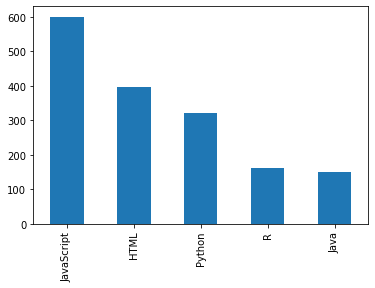

In [9]:
df.language.value_counts().plot(kind='bar')

<AxesSubplot:xlabel='language'>

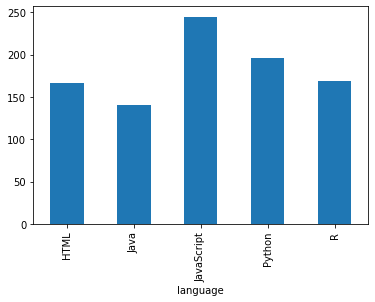

In [10]:
df.total_words.groupby(df.language).mean().plot(kind='bar')

In [11]:
df.total_words.quantile(.66)

171.0

In [12]:
conditions = [(df.total_words > 171),
              (df.total_words >= 51) & (df.total_words <= 171),
              (df.total_words < 51)]
choices = ['high_count', 'med_count', 'low_count']

df['count_bin'] = np.select(conditions, choices)

In [13]:
df_plot = df.groupby(['language', 'count_bin']).size().reset_index().pivot(columns='count_bin', index='language', values=0)

<AxesSubplot:xlabel='language'>

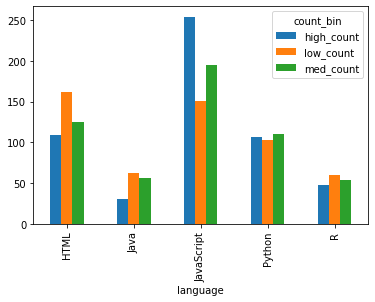

In [14]:
df_plot.plot(kind='bar')

In [15]:
df.language.value_counts()

JavaScript    600
HTML          396
Python        320
R             162
Java          149
Name: language, dtype: int64

In [16]:
JavaScript_freq = pd.Series(JavaScript_words).value_counts()
HTML_freq = pd.Series(HTML_words).value_counts()
Python_freq = pd.Series(Python_words).value_counts()
Java_freq = pd.Series(Java_words).value_counts()
R_freq = pd.Series(R_words).value_counts()
all_freq = pd.Series(all_words).value_counts()

In [18]:
word_counts = (pd.concat([all_freq, JavaScript_freq, HTML_freq, Python_freq, 
                    Java_freq, R_freq], axis=1, sort=True)
                .set_axis(['all', 'JavaScript', 'HTML', 'Python', 'Java', 'R'], axis=1, inplace=False)
                .fillna(0)
                .apply(lambda s: s.astype(int)))

word_counts.head()

,all,JavaScript,HTML,Python,Java,R
aa,2,0,1,0,1,0
aaa,1,0,0,0,1,0
aaaa,3,0,0,1,0,2
aac,1,0,0,0,1,0
aachal,2,2,0,0,0,0


In [19]:
word_counts.sort_values(by='all', ascending=False).head(20)

,all,JavaScript,HTML,Python,Java,R
build,1475,1268,90,54,41,22
npm,1348,1207,93,15,33,0
react,1302,1209,47,22,24,0
section,1130,843,219,42,8,18
test,1115,782,125,127,55,26
user,1043,482,216,187,141,17
feature,1015,520,147,264,63,21
install,973,573,113,218,36,33
need,928,539,160,135,48,46
make,919,554,178,124,40,23


In [20]:
word_counts.sort_values(by='Python', ascending=False).head(20)

,all,JavaScript,HTML,Python,Java,R
python,515,75,82,346,2,10
model,597,82,35,316,10,154
feature,1015,520,147,264,63,21
install,973,573,113,218,36,33
user,1043,482,216,187,141,17
bot,327,68,56,186,15,2
depression,509,103,148,173,42,43
people,891,296,318,155,53,69
time,842,410,185,152,64,31
twitter,220,16,40,145,1,18


In [21]:
js_top = word_counts.sort_values(by='JavaScript', ascending=False).head(20)
html_top = word_counts.sort_values(by='HTML', ascending=False).head(20)
python_top = word_counts.sort_values(by='Python', ascending=False).head(20)
java_top = word_counts.sort_values(by='Java', ascending=False).head(20)
r_top = word_counts.sort_values(by='R', ascending=False).head(20)

In [22]:
top_words = (pd.concat([js_top, html_top, python_top, java_top,
                    r_top], axis=0, sort=True)
                .fillna(0)
                .apply(lambda s: s.astype(int)))

top_words.head()

,HTML,Java,JavaScript,Python,R,all
build,90,41,1268,54,22,1475
react,47,24,1209,22,0,1302
npm,93,33,1207,15,0,1348
section,219,8,843,42,18,1130
test,125,55,782,127,26,1115


In [23]:
top_words= top_words.drop(columns=['all'])

In [24]:
top_words

,HTML,Java,JavaScript,Python,R
build,90,41,1268,54,22
react,47,24,1209,22,0
npm,93,33,1207,15,0
section,219,8,843,42,18
test,125,55,782,127,26
...,...,...,...,...,...
width,66,22,129,31,76
folder,72,14,318,92,73
file,119,37,404,132,72
following,75,22,253,136,70


In [ ]:
tops = top_words[top_words.index.value_counts() > 2]

In [ ]:
tops.index.unique()

In [ ]:
tops.groupby(tops.index).sum()

In [ ]:
len(word_counts[word_counts['all'] > 1000])

In [ ]:
most_freq_1200 = word_counts[word_counts['all'] > 1000] 
most_freq_1200 = most_freq_1200[most_freq_1200['all'] < 1200]
most_freq_1700 = word_counts[word_counts['all'] >= 1200]
most_freq_1700 = most_freq_1700[most_freq_1700['all'] < 1700]
most_freq = word_counts[word_counts['all'] >= 1700]

In [ ]:
most_freq.head()

In [25]:
word_perc = pd.DataFrame()
for col in most_freq.columns:
    word_perc = word_perc.append(most_freq[col].sort_values(ascending=False)/most_freq[col].sum())

word_perc_1200 = pd.DataFrame()
for col in most_freq_1200.columns:
    word_perc_1200 = word_perc_1200.append(most_freq_1200[col].sort_values(ascending=False)/most_freq_1200[col].sum())
    
word_perc_1700 = pd.DataFrame()
for col in most_freq_1700.columns:
    word_perc_1700 = word_perc_1700.append(most_freq_1700[col].sort_values(ascending=False)/most_freq_1700[col].sum())

NameError: name 'most_freq' is not defined

In [ ]:
word_perc

In [ ]:
plt.rcParams["figure.figsize"] = (20,10)
most_freq.plot(kind='bar')

In [ ]:
plt.rcParams["figure.figsize"] = (20,10)
word_perc.plot(kind='bar')

In [ ]:
word_perc_T = word_perc.T
word_perc_1200_T = word_perc_1200.T
word_perc_1700_T = word_perc_1700.T

to look at similarities, we simple look at bars w similar heights. That will show they have a similar distribution of that specific word

In [ ]:
plt.rcParams["figure.figsize"] = (20,8)
word_perc_T.plot(kind='bar')

In [ ]:
plt.rcParams["figure.figsize"] = (20,8)
word_perc_1200_T.plot(kind='bar')

In [ ]:
word_perc_T

In [ ]:
plt.rcParams["figure.figsize"] = (20,8)
word_perc_1700_T.plot(kind='bar')

In [ ]:
langs = pd.concat([df.language.value_counts(),
                    df.language.value_counts(normalize=True)], axis=1)
langs.columns = ['counts', 'percent']
langs

In [ ]:
df

In [ ]:
trigrams = [x for x in df['lemmatized'] for x in trigrams(x.split())]
trigrams

In [ ]:
tri_counts = Counter(trigrams)
print (tri_counts)

In [ ]:
top = tri_counts.most_common(10)
print (top)

In [ ]:
from nltk.util import ngrams

# n = 2
# bigrams = all_words.apply(lambda x:" ".join(x for x in x.split(), n))

In [ ]:
df

In [ ]:
top_20_bigrams = (pd.Series(nltk.ngrams(all_words, 2))
                      .value_counts()
                      .head(20))

top_20_bigrams.head(20)

In [27]:
from sklearn.feature_extraction.text import TfidfVectorizer
from pprint import pprint

In [28]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, export_graphviz
from sklearn.metrics import classification_report


tfidf = TfidfVectorizer()
X = tfidf.fit_transform(df.lemmatized)
y = df.language

X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, test_size=.2)

train = pd.DataFrame(dict(actual=y_train))
test = pd.DataFrame(dict(actual=y_test))

lm = LogisticRegression().fit(X_train, y_train)

train['predicted'] = lm.predict(X_train)
test['predicted'] = lm.predict(X_test)


In [29]:
print('Accuracy: {:.2%}'.format(accuracy_score(train.actual, train.predicted)))
print('---')
print('Confusion Matrix')
print(pd.crosstab(train.predicted, train.actual))
print('---')
print(classification_report(train.actual, train.predicted))

Accuracy: 92.24%
---
Confusion Matrix
actual      HTML  Java  JavaScript  Python    R
predicted                                      
HTML         301    11           4       4    4
Java           0    70           0       0    0
JavaScript    13    32         474      14    5
Python         2     6           2     237    2
R              1     0           0       1  118
---
              precision    recall  f1-score   support

        HTML       0.93      0.95      0.94       317
        Java       1.00      0.59      0.74       119
  JavaScript       0.88      0.99      0.93       480
      Python       0.95      0.93      0.94       256
           R       0.98      0.91      0.95       129

    accuracy                           0.92      1301
   macro avg       0.95      0.87      0.90      1301
weighted avg       0.93      0.92      0.92      1301



In [30]:
print('Accuracy: {:.2%}'.format(accuracy_score(test.actual, test.predicted)))
print('---')
print('Confusion Matrix')
print(pd.crosstab(test.predicted, test.actual))
print('---')
print(classification_report(train.actual, train.predicted))

Accuracy: 56.13%
---
Confusion Matrix
actual      HTML  Java  JavaScript  Python   R
predicted                                     
HTML          48    10          19      13  11
Java           0     4           0       1   0
JavaScript    23    13          93      22   5
Python         4     3           6      24   3
R              4     0           2       4  14
---
              precision    recall  f1-score   support

        HTML       0.93      0.95      0.94       317
        Java       1.00      0.59      0.74       119
  JavaScript       0.88      0.99      0.93       480
      Python       0.95      0.93      0.94       256
           R       0.98      0.91      0.95       129

    accuracy                           0.92      1301
   macro avg       0.95      0.87      0.90      1301
weighted avg       0.93      0.92      0.92      1301



In [31]:
tfidf = TfidfVectorizer()
X = tfidf.fit_transform(df.lemmatized)
y = df.language

X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, test_size=.2, random_state=123)

tree = DecisionTreeClassifier(max_depth=10, random_state=123)
tree.fit(X_train, y_train)

print(f'Accuracy Score: {tree.score(X_train, y_train) * 100:.2f}%')

Accuracy Score: 68.95%


In [32]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, export_graphviz
from sklearn.metrics import classification_report
from sklearn import tree

In [33]:
cv = CountVectorizer()
X = cv.fit_transform(df.lemmatized)
y = df.language

X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, test_size=.2, random_state=123)

tree = DecisionTreeClassifier(max_depth=10, random_state=123)
tree.fit(X_train, y_train)

print(f'Accuracy Score: {tree.score(X_train, y_train) * 100:.2f}%')

Accuracy Score: 66.33%


In [ ]:
cv = CountVectorizer(ngram_range=(2, 2))
X = cv.fit_transform(df.lemmatized)
y = df.language

X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, test_size=.2)

tree = DecisionTreeClassifier(max_depth=8, random_state=123)
tree.fit(X_train, y_train)

print(f'Accuracy Score: {tree.score(X_test, y_test) * 100:.2f}%')

In [ ]:
cv = CountVectorizer(ngram_range=(3, 3))
X = cv.fit_transform(df.stemmed)
y = df.language

# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.2, random_state=13)
# X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size = .25, random_state=13)
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, test_size=.2)

tree = DecisionTreeClassifier(max_depth=10, random_state=123)
tree.fit(X_train, y_train)

print(f'Accuracy Score: {tree.score(X_train, y_train) * 100:.2f}%')

In [ ]:
qfjwaivchE3

In [ ]:
all_words = re.sub(r'[^\w\s]', '', (' '.join(df.lemmatized))).split()
all_freq = pd.Series(all_words).value_counts()
    
    mask = all_freq > 1
    all_not_unique = list(all_freq[mask].index)

In [ ]:
bigrams = df.apply(lambda x : list(nltk.ngrams(x, 2)))

In [ ]:
bigrams

In [ ]:
def make_word_list(df):
    """ creates a list of every not unique word in dataframe"""
    all_words = re.sub(r'[^\w\s]', '', (' '.join(df.lemmatized))).split()
    all_freq = pd.Series(all_words).value_counts()
    
    mask = all_freq > 1
    all_not_unique = list(all_freq[mask].index)
    
    return all_not_unique

def finding_non_single_words(x):
    """finds all words in column that appear in df more than one time
    will be used to make a column that counts words that appear more than once"""
    all_not_unique = make_word_list(df)
    l = []
    for w in x:
        if w in all_not_unique:
            l.append(w)
    return l


def feature_engineering(df):
    """creates calculated columns for df subsetted by type of column"""
    
    #list making features 
    df['word_list'] = df.lemmatized.apply(lambda x: re.sub(r'[^\w\s]', '', x).split())
    df['unique_words'] = df.word_list.apply(lambda x: pd.Series(x).unique())
    df['non_single_words'] = df.word_list.apply(lambda x: finding_non_single_words(x))

    # counting
    df['word_count_simple'] = df.lemmatized.str.count(" ") + 1
    df['word_count'] = df.word_list.apply(lambda x: len(x))
    df['unique_count'] = df.unique_words.apply(lambda x: len(x))
    df['non_single_count'] = df.non_single_words.apply(lambda x: len(x))

    # calculating
    df['percent_unique'] = (df.unique_count / df.word_count)
    df['percent_repeat'] = (1 - df.unique_count / df.word_count)
    df['percent_one_word'] = df.word_list.apply(lambda x: (pd.Series(x).value_counts() == 1).mean())
    df['percent_non_single'] = (df.non_single_count / df.word_count)

    return df

# new dataframes

def language_series(df):
    """makes df with words and frequency of words for each programming language"""

    all_words = (' '.join(df.lemmatized))
    all_words = re.sub(r'[^\w\s]', '', all_words).split()
    all_freq = pd.Series(all_words).value_counts()

    php_words = (' '.join(df[df.language == 'PHP'].lemmatized))
    php_words = re.sub(r'[^\w\s]', '', php_words).split()
    php_freq = pd.Series(php_words).value_counts()

    python_words = (' '.join(df[df.language == 'Python'].lemmatized))
    python_words = re.sub(r'[^\w\s]', '', python_words).split()
    python_freq = pd.Series(python_words).value_counts()

    java_words = (' '.join(df[df.language == 'Java'].lemmatized))
    java_words = re.sub(r'[^\w\s]', '', java_words).split()
    java_freq = pd.Series(java_words).value_counts()

    js_words = (' '.join(df[df.language == 'JavaScript'].lemmatized))
    js_words = re.sub(r'[^\w\s]', '', js_words).split()
    js_freq = pd.Series(js_words).value_counts()

    freq_df = pd.DataFrame({'all': all_freq,
                       'php': php_freq,
                       'python': python_freq,
                       'java': java_freq,
                       'java_script': js_freq
                        })
    freq_df = freq_df.fillna(0)
    freq_df = freq_df.astype(int)

    return freq_df

def make_language_df(df=df):
    """creates a data frame of words in rows"""
    freq_df = language_series(df)
    
    freq_list = freq_df['all'].sort_values(ascending = False).head(15).index
    
    df_js = df[0:200]
    df_python = df[200:400]
    df_java = df[400:600]
    df_php= df[600:800]
    
    all_list = []
    js_list = []
    python_list = []
    php_list = []
    java_list = []
    
    for i in freq_list:
        v = len(pd.DataFrame({'loc_index' :df[df.lemmatized.apply(lambda x: len(re.findall(i, x))) > 0].index}))
        all_list.append(v)
    
        js = len(pd.DataFrame({'loc_index' :df_js[df_js.lemmatized.apply(lambda x: len(re.findall(i, x))) > 0].index}))
        js_list.append(js)
   
        py = len(pd.DataFrame({'loc_index' :df_python[df_python.lemmatized.apply(lambda x: len(re.findall(i, x))) > 0].index}))
        python_list.append(py)
    
        php = len(pd.DataFrame({'loc_index' :df_php[df_php.lemmatized.apply(lambda x: len(re.findall(i, x))) > 0].index}))
        php_list.append(php)
    
        jv = len(pd.DataFrame({'loc_index' :df_java[df_java.lemmatized.apply(lambda x: len(re.findall(i, x))) > 0].index}))
        java_list.append(jv)
        
    language_df = pd.DataFrame({'word': freq_list,
                         'all_languages': all_list,
                        'javascript': js_list,
                         'python': python_list,
                        'php': php_list,
                            'java': java_list
                        })
        
    return language_df